# Python Basics

This notebook closely follows the steps that have been discussed during the data science course that was taught at NYU in Spring 2017. 
(*The hope is that this document will organically grow into a self tutorial*)

The original codes based on which a lot of this document is written can be found in [Kevin Munger's git repo](https://github.com/kmunger/DataScienceCourse)

There are multiple reasons one would want to use notebooks. Some that I have found useful so far are as follows:
* Simply it provides a clean ide (a graphical user interface, so that the user doesn't need to constantly work in a terminal and imagine what is happening) to work in. 
* Notebooks provide the output inline, the figures that you make will be displayed right below the code. So you can make changes and see the results in real time.
* It is very useful when using remore servers. For example, if I wanted to use MATLAB in the graphical mode on a remote server, the network would need to transfer back and forth not only the text but also the entire graphical data corresponding to the ide. This can be very slow and cause problems like the graphical interface being very slow with a lot of lag. Instead jupyter noterbooks circumvent this problem. Only the text and some info about figures is being transferred back and forth at the time of execution. So, the user can get the feel of working in an IDE, but at the same time not experience the lag.
* Also, it work with multiple programming/scripting languages. This document here is in Python, but I could just as easily have done all this in MATLAB (or any other interpretted language)


**Here is some basic math and printing**

In [16]:
earth_radius_miles = 3959.

def convert_to_km(radius_miles):
   radius_km = radius_miles*1.6
   return radius_km

earth_radius_km = convert_to_km(earth_radius_miles)

# notice that there are different ways to print strings
print('The radius of the earth is ' + str(earth_radius_miles) + ' miles or %.2f' % earth_radius_km + ' km')

The radius of the earth is 3959.0 miles or 6334.40 km


In [19]:
mars_radius_miles = 2106. 

# play with the condition here
condition = mars_radius_miles < earth_radius_miles

if condition:
    print("Dude Earth is huge!, but Mars is tiny")
else:
    print("Mars is so big, I am tired of living on tiny earth")

Dude Earth is huge!, but Mars is tiny


**Default data types in Python**

In [49]:
# lists
# the data collection doesn't need to be the same type
A = [True, 'True', 1]
B = [A, False] # a list of lists and other things
print(B)

A.append(False) # added element to a list
print(A)

print(A[0])  # element access 

# Dictionaries
# reference data by keys rather than indices
dic_test = {"Earth": 3959.0, "Mars": 2106.}
print(dic_test)

[[True, 'True', 1], False]
[True, 'True', 1, False]
True
{'Mars': 2106.0, 'Earth': 3959.0}


**Loops**

In [50]:
for a in range(0,len(A)):
    print(A[a] , str(a))

True 0
True 1
1 2
False 3


In [51]:
for key in dic_test:
    print('The radius of {0}  is {1} miles'.format(key, dic_test[key]))

The radius of Mars  is 2106.0 miles
The radius of Earth  is 3959.0 miles


**What about this numpy thing? **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This section does a logistic regression. Details about logistic regression coming soon. 

In [2]:

N=1000
K=5
X = np.random.random([N,K])

In [7]:
print(X[100,:])
print(X.shape)

[ 0.73438378  0.63038231  0.89805368  0.16762678  0.55962909]
(1000, 5)


In [9]:
beta = 2 * (np.random.random(K) - 0.5) # the value 0.5 was broadcast to all the random numbers
beta

array([-0.50801601, -0.80661475,  0.23414617, -0.70222714,  0.2842762 ])

In [10]:
beta.mean()

-0.29968710714770885

In [11]:
sims = 100000
means = []
for i in range(sims):
    means.append(2*(np.random.random(K) - 0.5).mean())

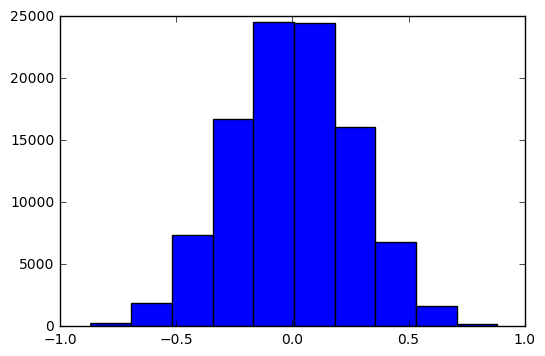

In [12]:
plt.hist(means)
plt.show()

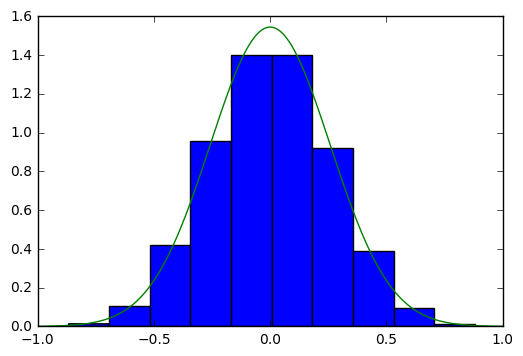

In [13]:
from scipy.stats import norm
mu = 0
sig = np.sqrt(4/60.0)
xs = np.linspace(-1,1,1000)
ys = norm.pdf(xs,mu,sig)

plt.hist(means, normed = True)
plt.plot(xs, ys)
plt.show()

In [29]:
def score_logistic_regression(X,beta): 
    '''
    '''
    
    xbeta = X.dot(beta)  #used vectorization capabilities of numpy here
    print(xbeta.shape)
    
    prob_score = 1/(1+ np.exp(-1*xbeta))
    
    return prob_score


In [30]:
A = score_logistic_regression(X,beta)

(1000,)


(array([  26.,   88.,  169.,  195.,  200.,  162.,   73.,   56.,   27.,    4.]),
 array([ 0.15547911,  0.19678502,  0.23809092,  0.27939683,  0.32070274,
         0.36200864,  0.40331455,  0.44462045,  0.48592636,  0.52723226,
         0.56853817]),
 <a list of 10 Patch objects>)

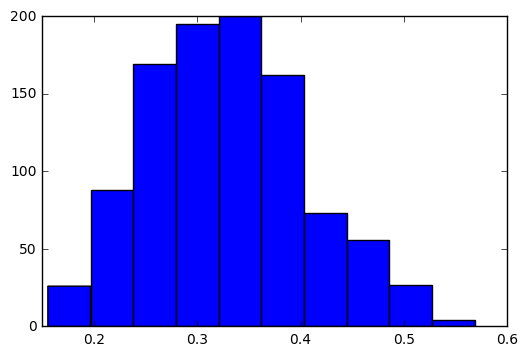

In [32]:
plt.hist(A)

** What about pandas? **

In [33]:
import pandas as pd

In [34]:
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [41]:
print("Column names are: ")
print("")

for column_name in loansData.columns.values:
    print(column_name)
    
print("")
print('Total # of columns = {}'.format(len(loansData.columns)))

Column names are: 

Amount.Requested
Amount.Funded.By.Investors
Interest.Rate
Loan.Length
Loan.Purpose
Debt.To.Income.Ratio
State
Home.Ownership
Monthly.Income
FICO.Range
Open.CREDIT.Lines
Revolving.CREDIT.Balance
Inquiries.in.the.Last.6.Months
Employment.Length

Total # of columns = 14


In [44]:
loansData.head().transpose()

,81174,99592,80059,15825,33182
Amount.Requested,20000,19200,35000,10000,12000
Amount.Funded.By.Investors,20000,19200,35000,9975,12000
Interest.Rate,8.90%,12.12%,21.98%,9.99%,11.71%
Loan.Length,36 months,36 months,60 months,36 months,36 months
Loan.Purpose,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,credit_card
Debt.To.Income.Ratio,14.90%,28.36%,23.81%,14.30%,18.78%
State,SC,TX,CA,KS,NJ
Home.Ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
Monthly.Income,6541.67,4583.33,11500,3833.33,3195
FICO.Range,735-739,715-719,690-694,695-699,695-699


In [ ]:
### work more with pandas later 